<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de Circuitos II

# Problema desafío



Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:

 * $\omega_p  = 500$ Hz
 * $\omega_s  = 1500$ Hz
 * $\alpha_{max}  = 1$ dB
 * $\alpha_{min}  = 18$ dB

a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de **máxima planicidad**.



b) Si el mismo diseño se planteara mediante una aproximación **Chebyshev**, se pide:
 
   * la función transferencia normalizada
   * las respuestas de módulo, fase y la localización de polos y ceros


<img src="./A1.jpeg" align="center" width="75%" />

In [13]:
%timeit
from sympy import *
import math as m
import time, sys

S = symbols('S')

w_p = 1
w_s = 3
alpha_max = 1
alpha_min = 18

epsilon_chevy = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
print("epsilon_chevy=", epsilon_chevy)

N_chevy = m.acosh((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1)) / (2 * m.acosh(w_s))

print("N_chevy=", N_chevy)
Redondeado=m.ceil(N_chevy)
print("Redondeado=" ,Redondeado )
a=(1/Redondeado)*(asinh(1/epsilon_chevy))
print("a=", a)


for i in range(Redondeado):
    Sk=( -sinh(a)*sin((2*i-1)/(2*Redondeado)*m.pi)+I*cosh(a)*cos((2*i-1)/(2*Redondeado)*m.pi) )
    print("Sk=",Sk)
    time.sleep(0.5)
 
print(expand( ((S-(-0.54885+I*0.89514)) * (S-(-0.54885-I*0.89514)) ) ))

print("Complete")

epsilon_chevy= 0.5088471399095875
N_chevy= 1.7509701524232137
Redondeado= 2
a= 0.713987679431763
Sk= 0.548867164281964 + 0.895128574019914*I
Sk= -0.548867164281964 + 0.895128574019914*I
S**2 + 1.0977*S + 1.1025119421
Complete


0 zeros: []
2 poles: [-0.54885+0.89513892j -0.54885-0.89513892j]
gain: 1.0


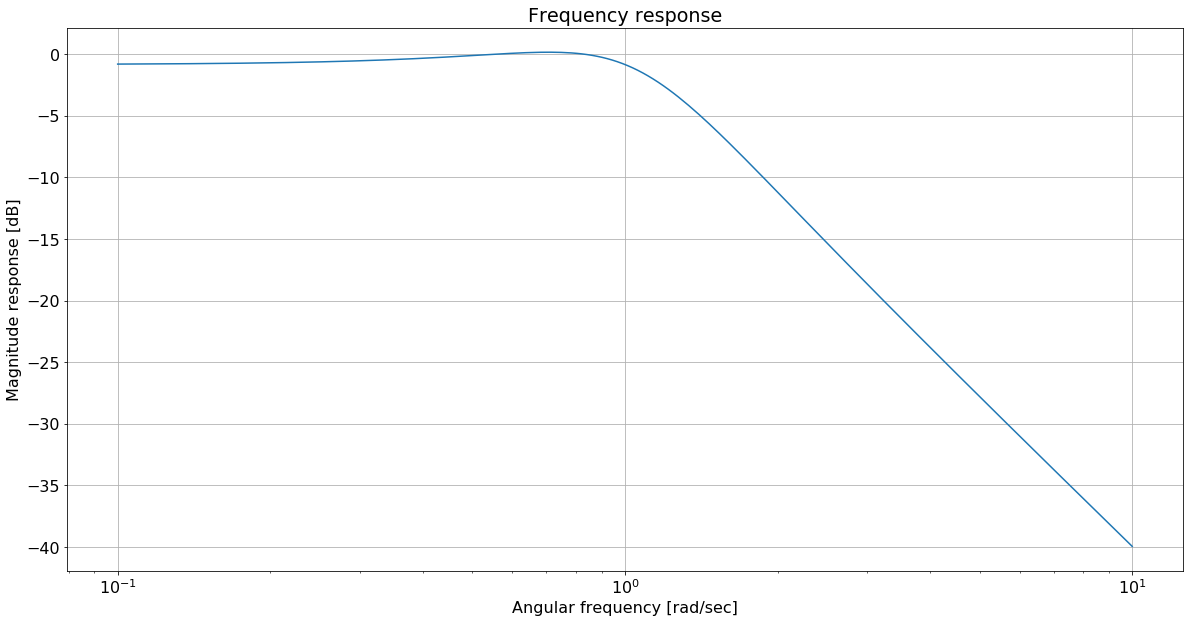

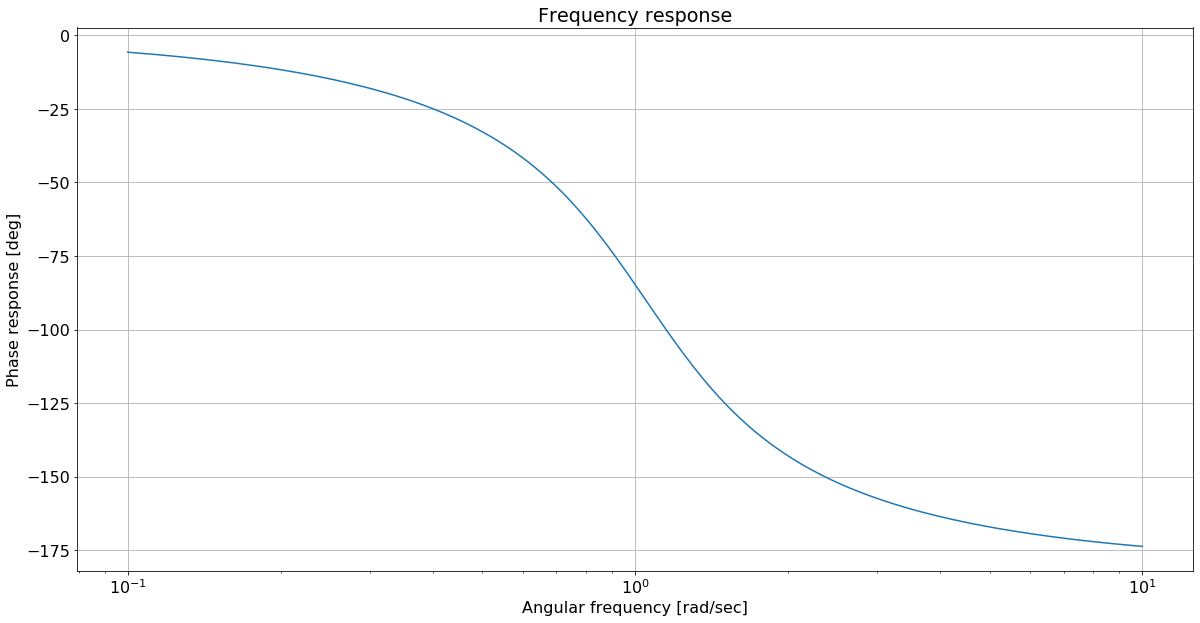

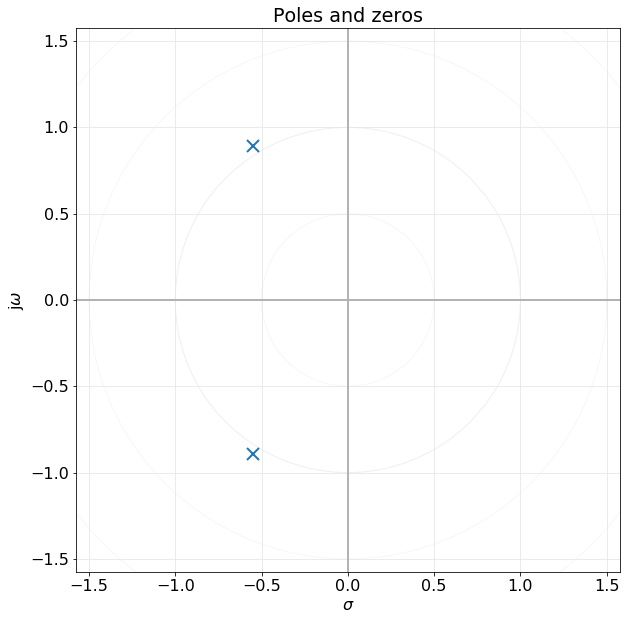

In [14]:
from scipy import signal
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

from splane import pzmap, grpDelay, bodePlot


num1=[1]
den1=[1,1.0977, 1.10251]
sys1=signal.TransferFunction(num1, den1)

bodePlot(sys1)

pzmap(sys1)

 c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.
  
 <img src="./circuito.png" align="center" width="75%" />
 <img src="./curva circuito.png" align="center" width="75%" />
 

 

# Una vez terminado ...
Una vez que hayas termiando con la confección del documento, podemos utilizar una ventaja muy importante de este tipo de documentos que es la posibilidad de compartirlos *online* mediante la [página de nbviewer](http://nbviewer.jupyter.org/). Para ello es necesario que tu notebook y todos los recursos asociados estén alojados en un repositorio público tuyo de [Github](https://github.com/). Como ejemplo, podés ver este mismo documento disponible [online en mi github](https://nbviewer.jupyter.org/github/marianux/jupytest/blob/master/desafio_cheby.ipynb) y [proyectado con nbviewer](https://github.com/marianux/jupytest/blob/master/desafio_cheby.ipynb). Yo prefiero usar la última opción, pero para gustos los colores ;)